In [21]:
#Importing the required libraries

import pandas as pd

#Data visualisation

from matplotlib import pyplot as plt
import seaborn as sns

#Data preprocessing and metric evaluation

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

#Prediction Models

from sklearn.dummy import DummyRegressor
from sklearn.linear_model import Lasso, Ridge, LinearRegression

#Cross-validation

from sklearn.model_selection import cross_val_score


In [20]:
#Reading the csv file

df = pd.read_csv("kc_house_data.csv")
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [3]:
#Creating the labelled data and feature dataframe

df = df.reset_index()
df = df.set_index('id')
y = df['price']
y

id
7129300520    221900.0
6414100192    538000.0
5631500400    180000.0
2487200875    604000.0
1954400510    510000.0
                ...   
263000018     360000.0
6600060120    400000.0
1523300141    402101.0
291310100     400000.0
1523300157    325000.0
Name: price, Length: 21613, dtype: float64

In [4]:
X = df.drop(['price'], axis = 1)
X = X.drop_duplicates()
X = X.loc[:,~X.columns.duplicated()]
X

,index,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,0,20141013T000000,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
6414100192,1,20141209T000000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
5631500400,2,20150225T000000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2487200875,3,20141209T000000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1954400510,4,20150218T000000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,21608,20140521T000000,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
6600060120,21609,20150223T000000,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
1523300141,21610,20140623T000000,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007


In [5]:
#Checking distribution of price ranges

interval = pd.cut(y, bins=50)
interval_ct = interval.value_counts()
frequency = pd.DataFrame(interval_ct)
frequency

,price
"(227500.0, 380000.0]",6467
"(380000.0, 532500.0]",5416
"(532500.0, 685000.0]",3584
"(685000.0, 837500.0]",2017
"(67375.0, 227500.0]",1538
"(837500.0, 990000.0]",1052
"(990000.0, 1142500.0]",417
"(1142500.0, 1295000.0]",320
"(1295000.0, 1447500.0]",218
"(1447500.0, 1600000.0]",158


In [6]:
#Determining correlation between fields

correlation = X.corr()
correlation

,index,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
index,1.000000,0.010794,0.107334,0.044717,-0.026877,0.179138,-0.007611,-0.013751,-0.095419,0.082050,0.071958,-0.041841,0.199549,-0.025601,-0.002199,0.000701,0.008649,0.026647,-0.029827
bedrooms,0.010794,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.107334,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,0.044717,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.026877,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.179138,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.007611,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,-0.013751,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.095419,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406
grade,0.082050,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.014414,-0.184862,0.114084,0.198372,0.713202,0.119248


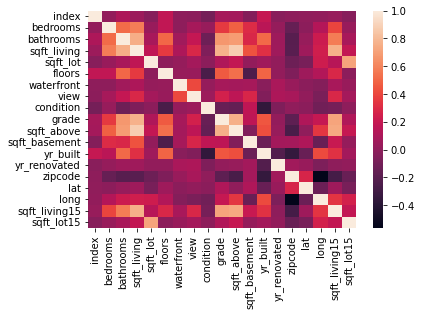

In [7]:
#Correlation visualisation

sns.heatmap(correlation, label=correlation)
plt.show()

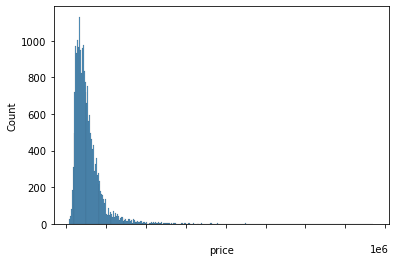

In [8]:
#Plotting histogram for price range analysis 

sns.histplot(y)
plt.xticks(color ='white')
plt.show()

#Here we can see that the data follows a normal gaussian distribution and is right skewed.

In [9]:
#Dropping irrelevant features

X = X.drop(['date', 'index'], axis=1)
X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,
7129300520,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
6414100192,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
5631500400,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2487200875,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1954400510,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
6600060120,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
1523300141,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007


In [10]:
#Splitting the data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X_train

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,
4045500510,1,1.00,960,40946,1.0,0,0,5,5,960,0,1945,0,98014,47.6951,-121.864,1320,20350
3824100020,3,1.75,1510,9720,1.0,0,0,3,7,1510,0,1948,1976,98028,47.7728,-122.258,1520,10037
6383000690,3,2.25,1670,6414,1.0,0,0,4,8,1670,0,1961,0,98117,47.6921,-122.386,2130,7035
2320069014,3,2.00,2660,192099,1.0,0,0,4,9,2660,0,1964,0,98022,47.2098,-122.016,2570,43561
5315101716,3,1.75,1690,13500,1.0,0,0,4,7,1690,0,1978,0,98040,47.5897,-122.233,1950,10500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2322069010,5,5.00,3960,94089,2.0,0,0,3,10,3960,0,1998,0,98038,47.3800,-122.011,2240,64468
2114700368,2,2.50,1400,1262,2.0,0,0,3,8,1160,240,2008,0,98106,47.5342,-122.349,1060,1524
5469501200,3,2.25,2360,14950,1.0,0,0,4,9,2360,0,1978,0,98042,47.3856,-122.158,2720,14388


In [11]:
#Normalising the data/Feature preprocessing

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
#Checking dummy baseline score for inferential evaluation

dummy = DummyRegressor().fit(X_train_scaled, y_train)
y_pred_dum = dummy.predict(X_test)
print("R2 score for Dummy Regression is:{}".format(r2_score(y_test, y_pred_dum)))

R2 score for Dummy Regression is:-0.0003331762965164131


In [13]:
#Using linear regression to evaluate model performance

lin = LinearRegression().fit(X_train, y_train)
y_pred_lin = lin.predict(X_test)
print("R2 score for Linear Regression is:{}".format(r2_score(y_test, y_pred_lin)))

R2 score for Linear Regression is:0.6900932169857978


In [14]:
#Using ridge regression to evaluate model performance

rid = Ridge(alpha=1).fit(X_train_scaled, y_train)
y_pred_rid = rid.predict(X_test_scaled)
print("R2 score for Ridge:{} ".format(r2_score(y_test, y_pred_rid)))

R2 score for Ridge:0.6900912679473576 


In [15]:
#Lasso regression to evaluate model performance

lasso = Lasso(alpha=1, max_iter=30000).fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)
print("R2 score for Lasso:{}".format(r2_score(y_test, y_pred_lasso)))

R2 score for Lasso:0.6900932425697928


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20297208053296.625, tolerance: 219486685028.4098
  model = cd_fast.enet_coordinate_descent(


In [16]:
#Polynomial features to check model fit on polynomial data

from sklearn.preprocessing import PolynomialFeatures

#Fit and transform data

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

In [31]:
#Polynomial fit for Ridge regression

ridge_poly = Ridge(alpha=10).fit(X_train_poly, y_train)
y_pred_poly = ridge_poly.predict(X_test_poly)
print("R2 score for Polynomial Regression is:{}".format(r2_score(y_test, y_pred_poly)))

R2 score for Polynomial Regression is:0.8150464654041593


In [32]:
#Cross validation

print("Cross validation scores are:", cross_val_score(ridge_poly, poly.fit_transform(X), y, cv=6))

Cross validation scores are: [0.8045079  0.81706532 0.81799213 0.79251802 0.79090337 0.78373339]


In [ ]:
#From the above code, it can be concluded that polynomial regression is the best fit model for data. 